In [1]:
import pandas as pd

# Try reading the data using Shift-JIS encoding
data_shiftjis= pd.read_csv('..//data//設計値変更後_pre_zaikodata_20230913までの設計値変更データ.csv',encoding='shift_jis')

# Display the first few rows of the data for confirmation
data_shiftjis.head()

,かんばんシリアル,伝票番号,拠点所番地,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,...,回収日時,発注取消日時,発注印刷LT,発注検収LT,発注順立装置入庫LT,発注順立装置出庫LT,発注組立LT,発注回収LT,更新日時,長期滞留フラグ
0,1Z23G00039168,XCBC150,10431,9033904A003,ｷﾔﾂﾌﾟ,2000,サトープレス工業（株）,本社工場,順立装置出庫済,2023/7/18,...,< NULL >,< NULL >,0.11,3.93,4.12,25.12,< NULL >,< NULL >,2023/9/1 17:50,< NULL >
1,1Z23G00039168,XCBC150,10431,9033904A003,ｷﾔﾂﾌﾟ,2000,サトープレス工業（株）,本社工場,順立装置出庫済,2023/7/18,...,< NULL >,< NULL >,0.11,3.93,26.71,42.66,< NULL >,< NULL >,2023/9/1 17:50,< NULL >
2,1Z23G00039654,XCBC240,10395,34989ECE010,ﾗﾍﾞﾙ,500,（株）槌屋,知立工場,回収済,2023/7/18,...,2023/9/11 16:11,< NULL >,0.27,4.51,4.88,52.40,< NULL >,59.39,2023/9/12 13:23,< NULL >
3,1Z23G00041222,XCBD780,10505,34989ECE030,ﾗﾍﾞﾙ,500,（株）槌屋,知立工場,回収済,2023/7/19,...,2023/9/7 18:12,< NULL >,2.27,4.51,5.08,40.78,< NULL >,54.47,2023/9/10 13:22,< NULL >
4,1Z23G00059286,XCBN070,10505,34989ECE030,ﾗﾍﾞﾙ,500,（株）槌屋,知立工場,順立装置出庫済,2023/7/25,...,< NULL >,< NULL >,0.26,4.48,4.84,40.91,< NULL >,< NULL >,2023/9/3 13:22,< NULL >


In [2]:
# Determine the product number with the most Kanban counts
#most_common_product = data_shiftjis['品番'].value_counts().idxmax()
#most_common_product = '3519510A010    '
most_common_product = 'G9201ECE010    '
most_common_product

'G9201ECE010    '

In [3]:
number = data_shiftjis.loc[:,"品番"].unique()
number

array(['9033904A003    ', '34989ECE010    ', '34989ECE030    ',
       '9033114006', 'G9201ECE010    ', '9033106A003    ', '9161140614',
       '35174ECB010    ', '41310ECB010    ', '35482TFA010    ',
       'G1163ECB010    ', '9011606048', '34989ECE020    ',
       '34989ECC010    ', '82824ECB010    ', '41310ECE010    ',
       '9014908A008    ', 'G1144ECE010    ', '35352ECB010    ',
       '9034118060', '9014860027', '9025006027', '3539450A010    ',
       '3040052001B    ', '01912ECB040    ', '3519510A010    ',
       '35300ECB010    ', '9011906908', '34989ECB030    ',
       '9010506A003    ', '34989ECB010    ', '82821ECB010    ',
       '33490ECE010    ', '9052409A003    ', '34989ECB020    ',
       '9093003179', '9031150A015    ', '01912ECB060    ',
       '9010508A014    ', 'G1250ECC010    ', '3548255A010    ',
       '9034108A010    ', '9030115A011    ', '35580ECB011    ',
       'G1250ECB010    ', '019128GA010    ', '9030117A010    ',
       '35409ECB010    ', '35195TFG010    

In [32]:
#filtered_product_data.isnull().sum()
filtered_product_data.head(1000)

,かんばんシリアル,伝票番号,拠点所番地,品番,品名,収容数,仕入先名,仕入先工場名,ステータス,納入日,...,回収日時,発注取消日時,発注印刷LT,発注検収LT,発注順立装置入庫LT,発注順立装置出庫LT,発注組立LT,発注回収LT,更新日時,長期滞留フラグ


In [4]:
data_shiftjis['印刷日時'] = pd.to_datetime(data_shiftjis['印刷日時'], errors='coerce')
data_shiftjis['検収日時'] = pd.to_datetime(data_shiftjis['検収日時'], errors='coerce')
data_shiftjis['順立装置入庫日時'] = pd.to_datetime(data_shiftjis['順立装置入庫日時'], errors='coerce')
data_shiftjis['順立装置出庫日時'] = pd.to_datetime(data_shiftjis['順立装置出庫日時'], errors='coerce')
data_shiftjis['回収日時'] = pd.to_datetime(data_shiftjis['回収日時'], errors='coerce')

# Filter data for the most common product
filtered_product_data = data_shiftjis[data_shiftjis['品番'] == most_common_product]
#print(filtered_product_data)

# Create a time range for every 2 hours
filtered_product_data2 = data_shiftjis[(data_shiftjis['ステータス'] == '回収済' ) & (data_shiftjis['品番'] == most_common_product)]
#filtered_product_data2 = filtered_product_data2.dropna(subset=['印刷日時', '回収日時'])  # 欠損値を削除する場合
#print(filtered_product_data2)
time_range = pd.date_range(start=filtered_product_data2['印刷日時'].min(), end=filtered_product_data2['回収日時'].max(), freq='2H')

# Calculate inventory levels for each time point
inventory_data = {
    'syagai': [],
    'nishiohigashi-plant': [],
    'zyundate': [],
    'kumitate mae': []
}

for time_point in time_range:

    before_center = filtered_product_data[(filtered_product_data['印刷日時'] <= time_point) & (filtered_product_data['検収日時'] > time_point)].shape[0]
    in_center = filtered_product_data[(filtered_product_data['検収日時'] <= time_point) & (filtered_product_data['順立装置入庫日時'] > time_point)].shape[0]
    in_device = filtered_product_data[(filtered_product_data['順立装置入庫日時'] <= time_point) & (filtered_product_data['順立装置出庫日時'] > time_point)].shape[0]
    before_assembly = filtered_product_data[(filtered_product_data['順立装置出庫日時'] <= time_point) & (filtered_product_data['回収日時'] > time_point)].shape[0]
       
    #inventory_data['物流センターに入る前'].append(before_center)
    #inventory_data['物流センター'].append(in_center)
    #inventory_data['順立装置'].append(in_device)
    #inventory_data['組み立て前'].append(before_assembly)

    inventory_data['syagai'].append(before_center)
    inventory_data['nishiohigashi-plant'].append(in_center)
    inventory_data['zyundate'].append(in_device)
    inventory_data['kumitate mae'].append(before_assembly)

# Convert inventory data to DataFrame for plotting
inventory_df = pd.DataFrame(inventory_data, index=time_range)

inventory_df.head(100)

,syagai,nishiohigashi-plant,zyundate,kumitate mae
2023-08-29 14:43:00,54,0,0,0
2023-08-29 16:43:00,54,0,0,0
2023-08-29 18:43:00,54,0,0,0
2023-08-29 20:43:00,54,0,0,0
2023-08-29 22:43:00,54,0,0,0
...,...,...,...,...
2023-09-06 12:43:00,30,107,50,10
2023-09-06 14:43:00,30,107,50,10
2023-09-06 16:43:00,30,107,41,9
2023-09-06 18:43:00,30,107,36,12


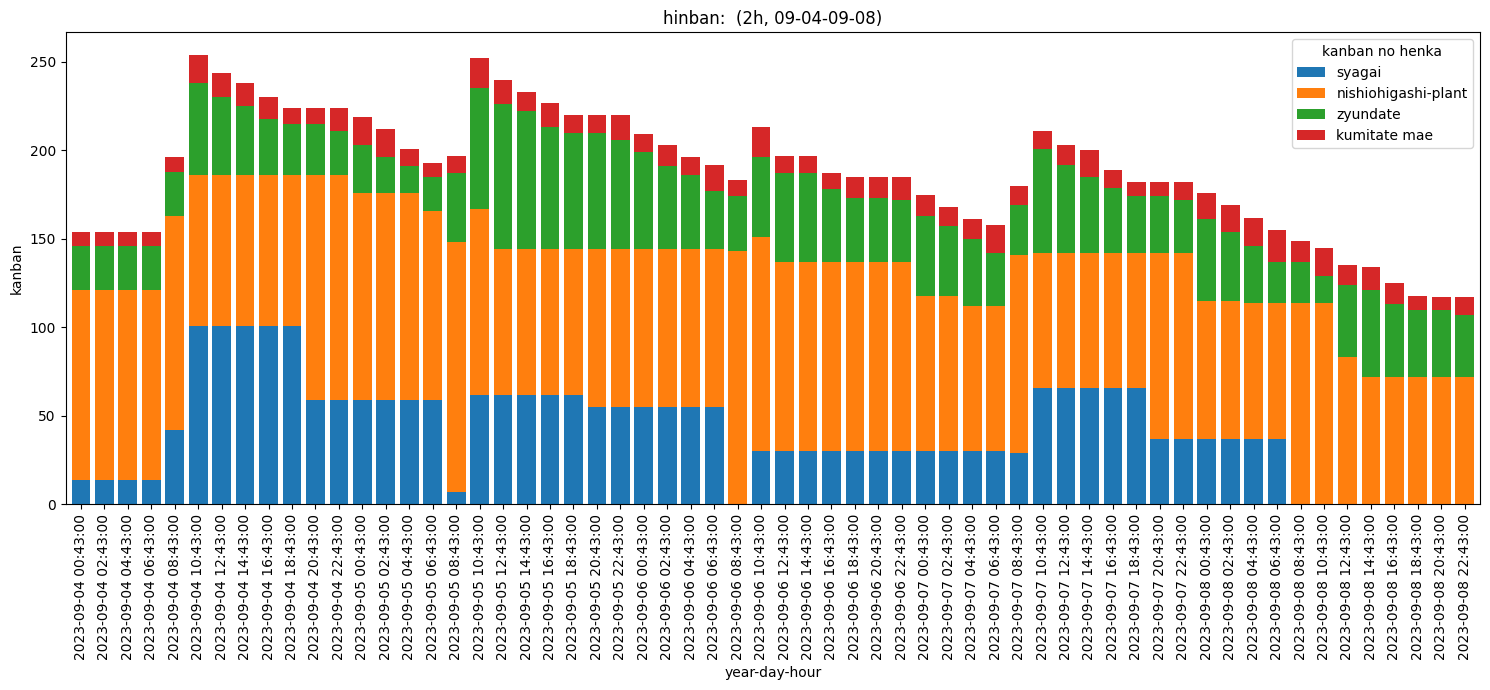

KeyError: '予定生産台数箱'

In [41]:
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Filter inventory dataframe for the specified date range and product
filtered_2h_inventory = inventory_df['2023-09-04':'2023-09-08']

# Plotting 2-hourly stacked bar chart for inventory levels without trying to drop the unnecessary column
#ax = filtered_2h_inventory.plot(kind='bar', stacked=True, figsize=(15,7), color="#FF9999", width=0.8)

# Plotting 2-hourly stacked bar chart for inventory levels without trying to drop the unnecessary column
ax = filtered_2h_inventory.plot(kind='bar', stacked=True, figsize=(15,7), color=colors, width=0.8)

# Formatting the plot
ax.set_title('hinban:  (2h, 09-04-09-08)')
ax.set_xlabel('year-day-hour')
ax.set_ylabel('kanban')
ax.legend(title='kanban no henka')

# Displaying every x-tick for clarity
for i, t in enumerate(ax.get_xticklabels()):
    if i % 1 != 0:
        t.set_visible(False)

plt.tight_layout()
plt.show()    
    
ZISSEKI = sum(filtered_2h_inventory.mean())

filtered_product_data2 = filtered_product_data[(filtered_product_data['印刷日時'] >= '2023-06-12') & 
                              (filtered_product_data['印刷日時'] <= '2023-06-16')]

YOTEI = (filtered_product_data2['予定生産台数箱'].mean() * filtered_product_data2['A'].mean() * (filtered_product_data2['C'].mean() + 1) / filtered_product_data2['B'].mean() + 
                    filtered_product_data2 ['予定生産台数箱'] .mean()* filtered_product_data2['基準在庫枚数日数'].mean() + 3)

print(int(ZISSEKI),int(YOTEI),ZISSEKI/YOTEI)

#物流センターに入る前: ピンク色 (#FF9999)
#物流センター: 青色 (#66B2FF)
#順立装置: 緑色 (#99FF99)
#組み立て前: オレンジ色 (#FFCC99)

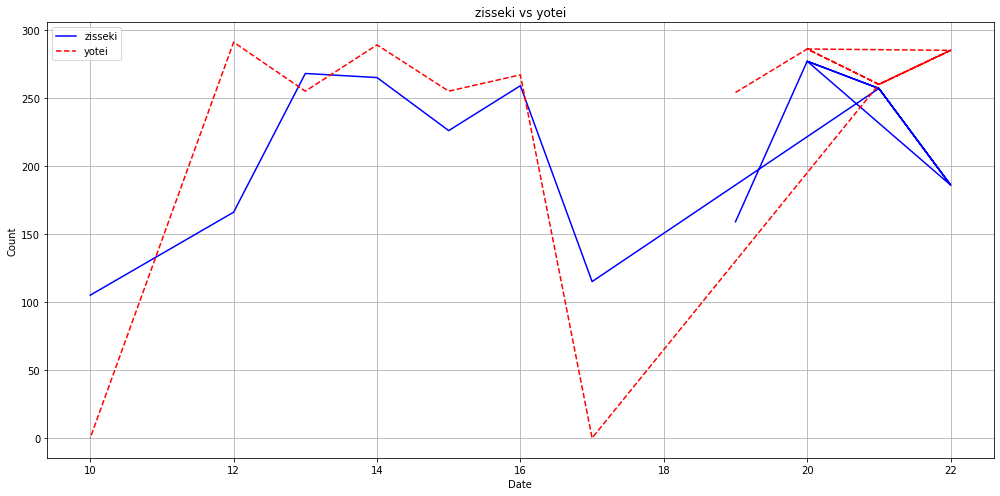

In [42]:
# Plotting the actual and planned production
plt.figure(figsize=(14,7))
plt.plot(filtered_product_data['回収日'], filtered_product_data['実績生産台数箱'], label='zisseki', color='blue')
plt.plot(filtered_product_data['回収日'], filtered_product_data['予定生産台数箱'], label='yotei', color='red', linestyle='--')
plt.title('zisseki vs yotei')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#filtered_product_data

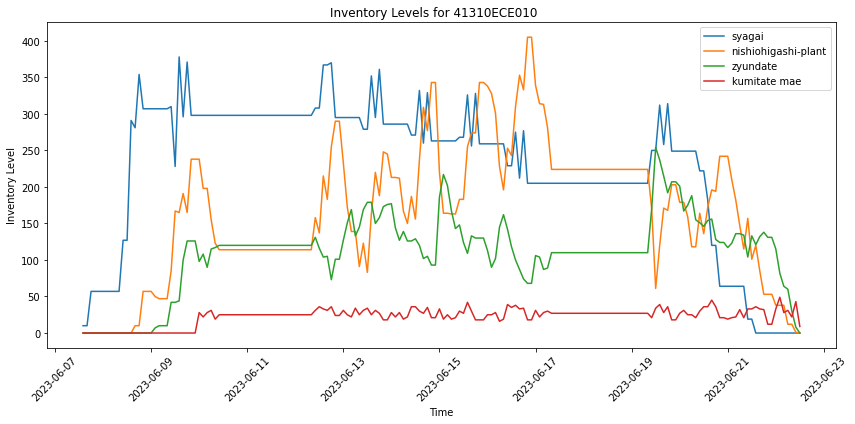

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# ...（既存のコード）...

# Convert inventory data to DataFrame for plotting
inventory_df = pd.DataFrame(inventory_data, index=time_range)

# Create a line plot for inventory levels
plt.figure(figsize=(12, 6))
plt.plot(inventory_df.index, inventory_df['syagai'], label='syagai')
plt.plot(inventory_df.index, inventory_df['nishiohigashi-plant'], label='nishiohigashi-plant')
plt.plot(inventory_df.index, inventory_df['zyundate'], label='zyundate')
plt.plot(inventory_df.index, inventory_df['kumitate mae'], label='kumitate mae')

# Set plot labels and title
plt.xlabel('Time')
plt.ylabel('Inventory Level')
plt.title(f'Inventory Levels for {most_common_product}')
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [93]:
data_shiftjis['品番'].unique()

array(['9033904A003    ', '9033106A003    ', '34989ECE010    ',
       '34989ECE020    ', '9025006027', '9011606048', '35352ECB010    ',
       '3539450A010    ', '34989ECE030    ', '34989ECB010    ',
       '9052409A003    ', '3519510A010    ', '35195ECE010    ',
       '34989ECC010    ', 'G1250ECE010    ', '34989ECB030    ',
       '9010506A003    ', '9034118060', '34989ECB020    ',
       '9030115A011    ', '82821XAE020    ', '82824ECE010    ',
       '33490ECE010    ', '9034108A010    ', 'G1250ECB010    ',
       '35165ECE010    ', '2030045013L    ', '2030044001J    ',
       '35145ECE010    ', '9030106A018    ', '35441ECB010    ',
       '3040052001B    ', '35198ECE010    ', '9033904A002    ',
       'G1250ECC010    ', '01912ECB060    ', '9030117A010    ',
       '35409ECB010    ', '5040056001E    ', '3548255A010    ',
       '35195TFG010    ', '35441TFA010    ', '36108ECB010    ',
       '9093003179', '82821ECB020    ', '9020156A002    ',
       '35847ECE020    ', '9034118090', '

In [98]:
filtered_product_data 

,Unnamed: 0,ROWID,かんばんシリアル,伝票番号,品番,品名,収容数,仕入先名,仕入先工場名,納入日,...,実績生産台数箱,予定生産台数箱,回収曜日,平均日量数,基準在庫枚数日数,ラック間口,滞留有無2,不等ピッチ便,不等ピッチ便フラグ,かんばん総枚数
302,302,857,1Z23F00030699,XBTG110,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/15,...,77.0,68.0,月,420.681818,0.042788,A1,4.0,NaN,NaN,228.949562
323,323,882,1Z23F00030827,XBTG110,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/15,...,77.0,68.0,月,420.681818,0.042788,A1,4.0,NaN,NaN,228.949562
324,324,883,1Z23F00030828,XBTG110,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/15,...,77.0,68.0,月,420.681818,0.042788,A1,4.0,NaN,NaN,228.949562
325,325,884,1Z23F00030830,XBTG110,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/15,...,77.0,68.0,月,420.681818,0.042788,A1,4.0,NaN,NaN,228.949562
355,355,924,1Z23F00031018,XBTG110,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/15,...,77.0,68.0,月,420.681818,0.042788,A1,4.0,NaN,NaN,228.949562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19858,19858,61391,1Z23F00015952,XBSS530,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/9,...,28.0,0.0,土,420.681818,0.042788,A1,0.0,NaN,NaN,3.000000
19897,19897,61435,1Z23F00016574,XBSS530,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/9,...,28.0,0.0,土,420.681818,0.042788,A1,0.0,NaN,NaN,3.000000
19898,19898,61436,1Z23F00016575,XBSS530,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/9,...,28.0,0.0,土,420.681818,0.042788,A1,0.0,NaN,NaN,3.000000
19899,19899,61437,1Z23F00016576,XBSS530,G1144ECB010,"ﾀｰﾐﾅﾙ,ﾓｰﾀｰｹｰﾌﾞﾙ",6,住友電気工業（株）,NaN,2023/6/9,...,28.0,0.0,土,420.681818,0.042788,A1,0.0,NaN,NaN,3.000000


In [5]:
import numpy as np

hinban = data_shiftjis['品番'].unique()

kanban_data = {
    'hinban':[],
    'hinmei':[],
    'zisseki': [],
    'yotei': [],
    'wariai': [],
    'syuyousuu': [],
    'hakosize': [],
    'ng': [],
    'wariai_nishiohigashi':[],
    'wariai_zyundate':[],
    'wariai_kumitate mae':[]
}


for i in range(len(hinban)):
    
        most_common_product = hinban[i]

        data_shiftjis['印刷日時'] = pd.to_datetime(data_shiftjis['印刷日時'], errors='coerce')
        data_shiftjis['検収日時'] = pd.to_datetime(data_shiftjis['検収日時'], errors='coerce')
        data_shiftjis['順立装置入庫日時'] = pd.to_datetime(data_shiftjis['順立装置入庫日時'], errors='coerce')
        data_shiftjis['順立装置出庫日時'] = pd.to_datetime(data_shiftjis['順立装置出庫日時'], errors='coerce')
        data_shiftjis['回収日時'] = pd.to_datetime(data_shiftjis['回収日時'], errors='coerce')

        # Filter data for the most common product
        filtered_product_data = data_shiftjis[data_shiftjis['品番'] == most_common_product]

        # Create a time range for every 2 hours
        time_range = pd.date_range(start=filtered_product_data['印刷日時'].min(), end=filtered_product_data['回収日時'].max(), freq='2H')

        # Calculate inventory levels for each time point
        inventory_data = {
            #'syagai': [],
            'nishiohigashi-plant': [],
            'zyundate': [],
            'kumitate mae': []
        }

        for time_point in time_range:
            before_center = filtered_product_data[(filtered_product_data['印刷日時'] <= time_point) & (filtered_product_data['検収日時'] > time_point)].shape[0]
            in_center = filtered_product_data[(filtered_product_data['検収日時'] <= time_point) & (filtered_product_data['順立装置入庫日時'] > time_point)].shape[0]
            in_device = filtered_product_data[(filtered_product_data['順立装置入庫日時'] <= time_point) & (filtered_product_data['順立装置出庫日時'] > time_point)].shape[0]
            before_assembly = filtered_product_data[(filtered_product_data['順立装置出庫日時'] <= time_point) & (filtered_product_data['回収日時'] > time_point)].shape[0]

            #inventory_data['物流センターに入る前'].append(before_center)
            #inventory_data['物流センター'].append(in_center)
            #inventory_data['順立装置'].append(in_device)
            #inventory_data['組み立て前'].append(before_assembly)

            #inventory_data['syagai'].append(before_center)
            inventory_data['nishiohigashi-plant'].append(in_center)
            inventory_data['zyundate'].append(in_device)
            inventory_data['kumitate mae'].append(before_assembly)

        # Convert inventory data to DataFrame for plotting
        inventory_df = pd.DataFrame(inventory_data, index=time_range)

        # Filter inventory dataframe for the specified date range and product
        filtered_2h_inventory = inventory_df['2023-06-12':'2023-06-16']

        # Plotting 2-hourly stacked bar chart for inventory levels without trying to drop the unnecessary column
        #ax = filtered_2h_inventory.plot(kind='bar', stacked=True, figsize=(15,7), color="#FF9999", width=0.8)

        # Plotting 2-hourly stacked bar chart for inventory levels without trying to drop the unnecessary column
        #ax = filtered_2h_inventory.plot(kind='bar', stacked=True, figsize=(15,7), color=colors, width=0.8)

        # Formatting the plot
        #ax.set_title('hinban: 41310ECE010  (2h, 6-12-6-16)')
        #ax.set_xlabel('year-day-hour')
        #ax.set_ylabel('kanban')
        #ax.legend(title='kanban no henka')

        # Displaying every x-tick for clarity
        #for i, t in enumerate(ax.get_xticklabels()):
            #if i % 1 != 0:
                #t.set_visible(False)

        #plt.tight_layout()
        #plt.show()    

        ZISSEKI = sum(filtered_2h_inventory.mean())

        filtered_product_data2 = filtered_product_data[(filtered_product_data['印刷日時'] >= '2023-06-12') & 
                                      (filtered_product_data['印刷日時'] <= '2023-06-16')]

        YOTEI = (filtered_product_data2['予定生産台数箱'].mean() * filtered_product_data2['A'].mean() * (filtered_product_data2['C'].mean() + 1) / filtered_product_data2['B'].mean() + 
                            filtered_product_data2 ['予定生産台数箱'] .mean()* filtered_product_data2['基準在庫枚数日数'].mean() + 3)

        if (np.isnan(ZISSEKI)!=True)  and (np.isnan(YOTEI)!=True):
            print("品番",hinban[i], "実かんばん", int(ZISSEKI),"予かんばん", int(YOTEI),ZISSEKI/YOTEI)
            kanban_data['hinban'].append(hinban[i])
            kanban_data['hinmei'].append(str(filtered_product_data2['品名'].unique()))
            kanban_data['zisseki'].append(ZISSEKI)
            kanban_data['yotei'].append(YOTEI)
            kanban_data['wariai'].append(ZISSEKI/YOTEI)
            kanban_data['syuyousuu'].append(filtered_product_data2['収容数'].unique())
            kanban_data['hakosize'].append(filtered_product_data2['箱サイズ'].unique())
            kanban_data['ng'].append(filtered_product_data2['滞留有無2'].mean())
            kanban_data['wariai_nishiohigashi'].append(filtered_2h_inventory['nishiohigashi-plant'].mean()/ZISSEKI)
            kanban_data['wariai_zyundate'].append(filtered_2h_inventory['zyundate'].mean()/ZISSEKI)
            kanban_data['wariai_kumitate mae'].append(filtered_2h_inventory['kumitate mae'].mean()/ZISSEKI)

        #物流センターに入る前: ピンク色 (#FF9999)
        #物流センター: 青色 (#66B2FF)
        #順立装置: 緑色 (#99FF99)
        #組み立て前: オレンジ色 (#FFCC99)

KeyError: '予定生産台数箱'

In [124]:
sorted(kanban_data, key =lambda x:(float(x['wariai']),x['hinban'],x['zisseki'],x['yotei']))

TypeError: string indices must be integers

In [180]:
# リストからDataFrameを作成
df = pd.DataFrame(kanban_data)

# CSVファイルに書き込み
df.to_csv('output.csv', index=False)

In [181]:
kanban_data['ng']
kanban_data['wariai_zyundate']

[0.1157556270096463,
 0.5625,
 0.48387096774193544,
 0.906832298136646,
 0.789237668161435,
 0.7334710743801653,
 0.7791601866251945,
 0.5734767025089605,
 0.790874524714829,
 0.5,
 0.5178571428571428,
 0.7075471698113208,
 0.8748280605226959,
 0.6650420564421037,
 0.6595744680851063,
 0.7486910994764397,
 0.32773109243697485,
 0.7586206896551724,
 0.7806122448979591,
 0.5252525252525252,
 0.7114470842332614,
 0.179456906729634,
 0.8278529980657641,
 0.75,
 0.6597744360902256,
 0.7572463768115942,
 0.7329192546583851,
 0.8317073170731707,
 0.5060827250608272,
 0.8198433420365536,
 0.7552182163187856,
 0.7918622848200313,
 0.7117903930131005,
 0.5601659751037344,
 0.7312992125984251,
 0.5727069351230425,
 0.8112927191679049,
 0.7844444444444445,
 0.6763513513513514,
 0.6377952755905513,
 0.7773487773487774,
 0.8412698412698414,
 0.6072186836518046,
 0.6226133651551313,
 0.6636085626911314,
 0.6865861411315957,
 0.6585788561525129,
 0.6654867256637168,
 0.6172549019607844,
 0.48891328210

In [189]:
import scipy.stats as st 
corr1, pvalue = st.spearmanr(kanban_data['ng'],kanban_data['wariai_nishiohigashi'])
corr2, pvalue = st.spearmanr(kanban_data['ng'],kanban_data['wariai_zyundate'])
corr3, pvalue = st.spearmanr(kanban_data['ng'],kanban_data['wariai_kumitate mae'])

In [190]:
corr1,corr2,corr3

(0.26666613311500126, 0.08413728156589262, -0.37133088214456156)